In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
( train_x , train_y ) , ( test_x , test_y ) = mnist.load_data() 

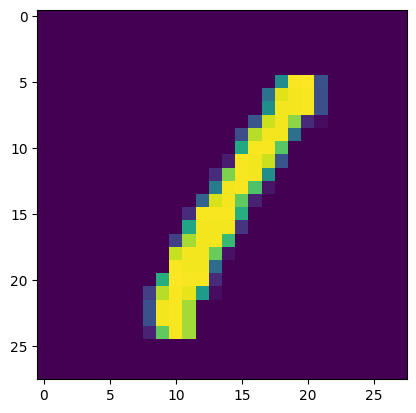

In [26]:
plt.imshow(train_x[3])

In [27]:
train_x = train_x.astype('float')/255
test_x = test_x.astype('float')/255

In [28]:
train_x = train_x.reshape((60000, 28 * 28))
test_x = test_x.reshape((10000, 28 * 28))

In [29]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [30]:
val_x = train_x[:10000]
val_y = train_y[:10000]
partial_train_x = train_x[10000:]
partial_train_y = train_y[10000:]

In [31]:
model = keras.Sequential([
    layers.Dense( 512 , activation= 'relu' , input_shape = (28*28,)),
    layers.Dropout(0.2),
    layers.Dense( 256 , activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense( 10 , activation = 'softmax')
])

In [32]:
model.compile(optimizer= 'adam',
              loss =  'categorical_crossentropy',
              metrics = ['accuracy'])

model.compile( optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.compile(loss= 'sparse_categorical_crossentropy')

In [33]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [34]:
history = model.fit(
    partial_train_x,
    partial_train_y,
    epochs = 50,
    batch_size = 128,
    validation_data = (val_x, val_y),
    callbacks = [early_stopping]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8422 - loss: 0.5200 - val_accuracy: 0.9624 - val_loss: 0.1276
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9635 - loss: 0.1202 - val_accuracy: 0.9718 - val_loss: 0.0894
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9747 - loss: 0.0837 - val_accuracy: 0.9768 - val_loss: 0.0806
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9802 - loss: 0.0640 - val_accuracy: 0.9776 - val_loss: 0.0768
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9776 - val_loss: 0.0751
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9867 - loss: 0.0402 - val_accuracy: 0.9790 - val_loss: 0.0763
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9890 - loss: 0.0335 - val_accuracy: 0.9796 - val_loss: 0.0759
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accu

In [35]:
test_loss , test_acc = model.evaluate(test_x, test_y)
print(f'Test accuracy:{test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0869
Test accuracy:0.9805


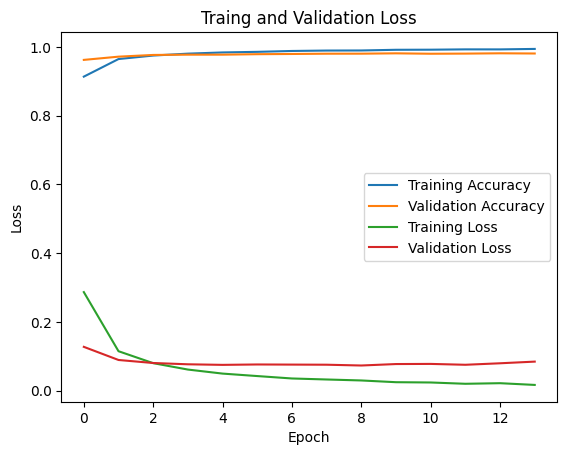

In [36]:
#plt.Figure(figsize=(12,8))

# plot accuracy 
#plt.Subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Traing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot loss
#plt.Subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Traing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [46]:
sample_idx = np.random.randint(10, len(test_x))
sample_img = test_x[sample_idx].reshape(1, -1)
True_label = np.argmax(test_y[sample_idx])

In [47]:
prediction = model.predict(sample_img)
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


AttributeError: module 'matplotlib.pyplot' has no attribute 'axies'

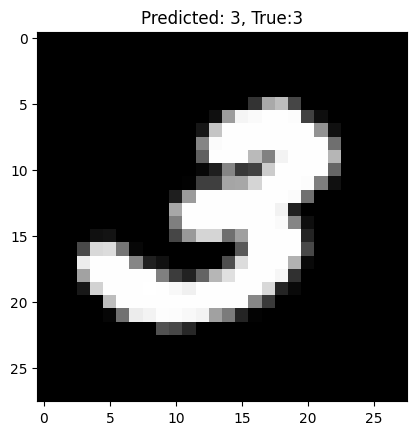

In [48]:
plt.imshow(test_x[sample_idx].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_label}, True:{True_label}')
plt.axies('off')
plt.show()